<a href="https://colab.research.google.com/github/QuantumQist/Scikit---Klasyfikacja-Liczb/blob/main/scikit_rozpoznawanie_liczb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Przygotowanie danych

In [ ]:
X, y = sklearn.datasets.load_digits(
    return_X_y = True,
    as_frame = True
)

In [ ]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y,
    test_size = 0.2
)

In [ ]:
len(X_train), len(X_test)

(1437, 360)

In [ ]:
X_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
161,0.0,0.0,2.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,2.0,14.0,16.0,10.0,0.0,0.0
555,0.0,0.0,2.0,10.0,14.0,10.0,0.0,0.0,0.0,1.0,...,9.0,0.0,0.0,0.0,1.0,10.0,15.0,16.0,6.0,0.0
1060,0.0,0.0,12.0,14.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,13.0,9.0,8.0,2.0,0.0,0.0
480,0.0,0.0,4.0,6.0,11.0,14.0,6.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0
1611,0.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

,target
161,9
555,9
1060,9
480,7
1611,4


# 2. Wyrysowanie pojedynczego obrazka

In [ ]:
def get_image(X:pd.DataFrame,
              y: pd.DataFrame,
              idx: int,
              plot: bool = True):
    """
    If the user wants it (plot=True), plots an image.

    Parameters:
    - X: pd.DataFrame
        Features
    - y: pd.DataFrame
        Labels
    - idx: int
        Index of an image within the dataframes to be plotted
    - plot: bool. Default is True
        If True, plots the image and shows the label

    Returns a tuple with image and label.
    """
    image = X.iloc[idx]
    label = y.iloc[idx]

    if plot:
        plt.imshow(image.values.reshape(8,8) / 16, cmap = "gray" )
        plt.title(f"Label: {label}")
        plt.axis(False)
        plt.show

    return image, label

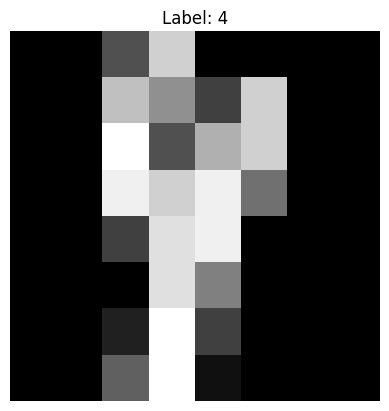

In [ ]:
get_image(X_train, y_train, idx = 42, plot = True);

# 3. Model uczenia maszynowego

In [ ]:
model = sklearn.linear_model.LogisticRegression(max_iter=1000)

# 4. Trening

In [ ]:
model.fit( X_train, y_train )

LogisticRegression(max_iter=1000)

# 5. Wyniki treningu

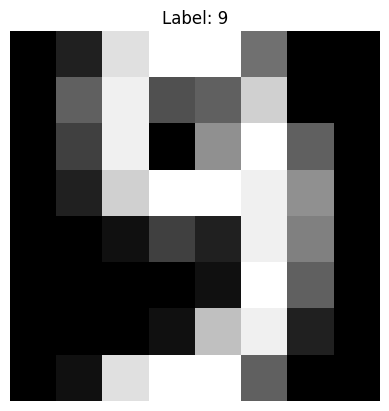

In [ ]:
np.random.seed(42)
RANDOM_IDX = np.random.randint(0, len(X_test))
RANDOM_IDX

image, label = get_image(X_test, y_test, RANDOM_IDX)

## 5.1. Przewidywanie na pojedynczym zdjęciu

In [ ]:
y_pred = model.predict(image.values.reshape(1, -1))
print(f"Prediction: {y_pred}")

Prediction: [9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 5.2. Przewidywania na pełnym zbiorze testowym

In [ ]:
y_pred = model.predict( X_test )

In [ ]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96
